# Credit Card Fraud Detection Capstone Project

## Problem Statement:
 Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day. Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.


## Step 1: Data Understanding 
The data set that you will be working on during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.

As you saw, the data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

The distribution plots of the variables were Gaussian, which might indicate the effects of transformations that had already occurred on the data set.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df.shape

(284807, 31)

In [5]:
#getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#checking any null value in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#checking the distribtion of data
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

## Step 2: Exploratory Data Analytics (EDA)

#### Correlation

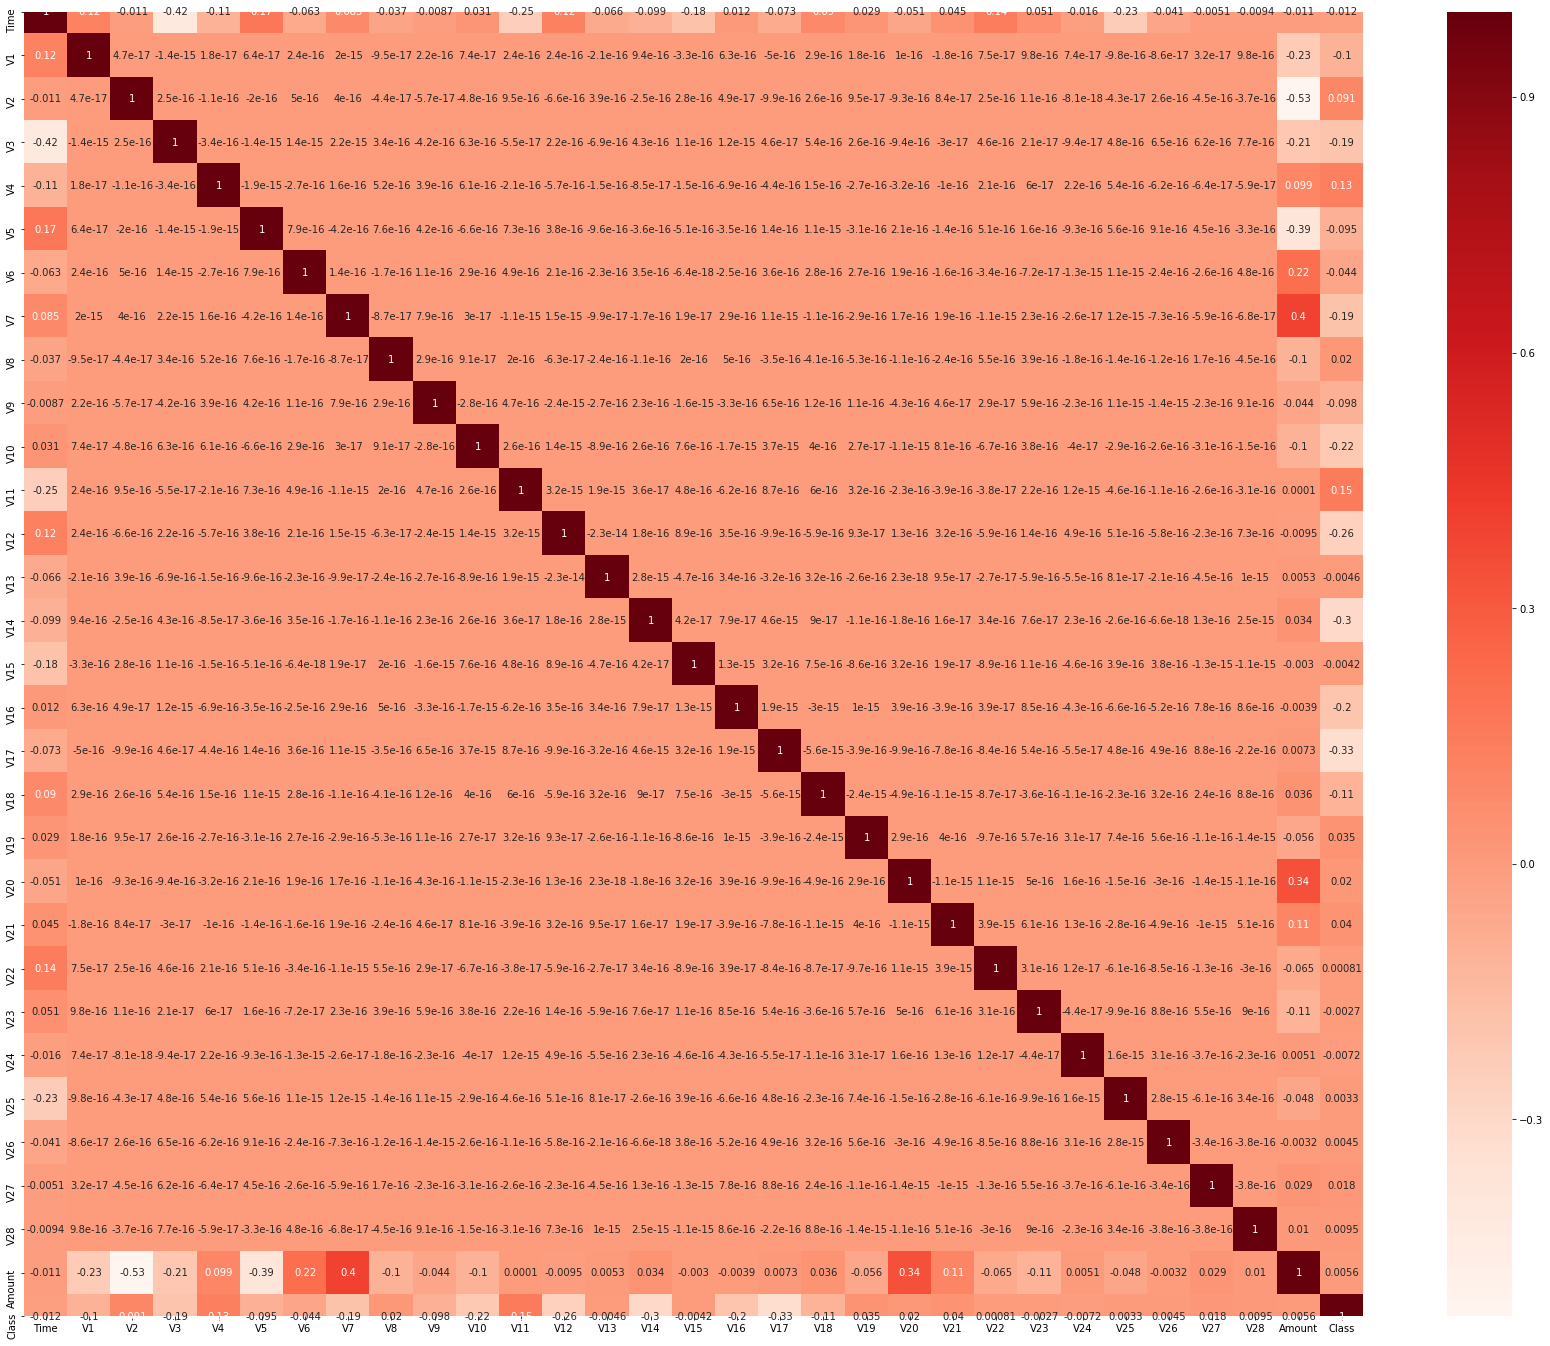

In [8]:
#getting the correlation of the dataset
cor = df.corr()
plt.figure(figsize=(30,24))
sns.heatmap(cor, cmap="Reds", annot=True)
plt.show()

#### Checking the target variable distribution

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Count')

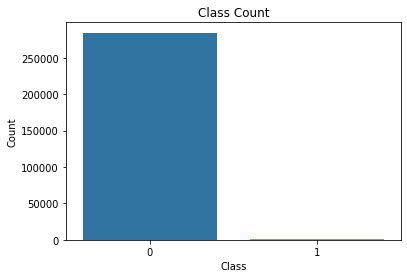

In [10]:
class_count = pd.value_counts(df.Class, sort = True).sort_index()
sns.countplot(x="Class", data=df)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

We can see that its a class imbalance problem, because the normal transactions are more than 2500000 but the fraud transactions are very less.

In [11]:
print('The percentage of Non-Fraudlent is ', round(df.Class.value_counts()[0]/len(df) * 100,2), '%.')
print('The percentage of Fraudlent ', round(df.Class.value_counts()[1]/len(df) * 100,2), '%.')

The percentage of Non-Fraudlent is  99.83 %.
The percentage of Fraudlent  0.17 %.


As we can see that the target variable distribution is highly imbalanced, we need to balance the target variable.

### Univariate Analysis

In [12]:
Fraud = df[df.Class == 1]
Non_Fraud = df[df.Class == 0]

Text(0, 0.5, 'Frequency')

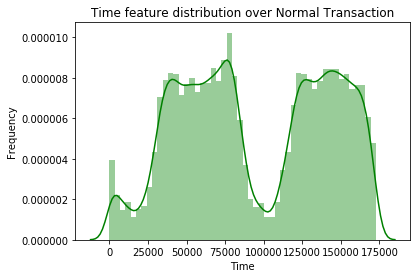

In [13]:
sns.distplot(Non_Fraud.Time, color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

We can see the distribution of Time over Normal Transactions, we can interpret that they are 2 peaks in the distribution and nothing unusual.

Text(0, 0.5, 'Frequency')

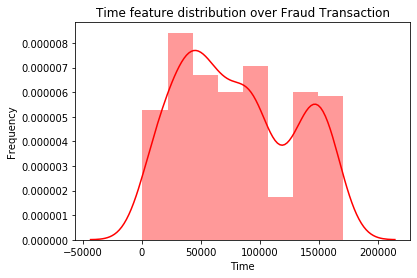

In [14]:
sns.distplot(Fraud.Time, color='r')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

We can see the distribution of Time over Fraud Transactions, we can interpret that it is a normal distribution and nothing unusual.

Text(0, 0.5, 'Frequency')

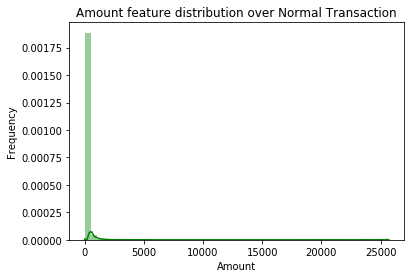

In [15]:
sns.distplot(Non_Fraud.Amount, color='g')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

We can see the distribution of Amount over Normal Transactions, we can interpret there is peak at the beginning but it becomes flat after the peak.

Text(0, 0.5, 'Frequency')

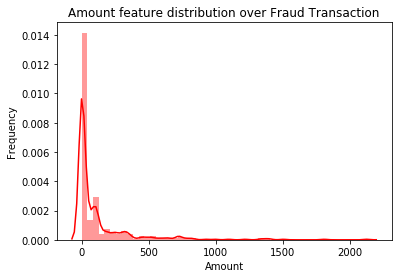

In [16]:
sns.distplot(Fraud.Amount, color='r')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

We can see the distribution of Amount over Fraud Transactions, we can interpret there is huge peak at the beginning but it becomes flat after 900.

### Bivariate Analysis

In [17]:
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [18]:
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

<Figure size 1008x1296 with 0 Axes>

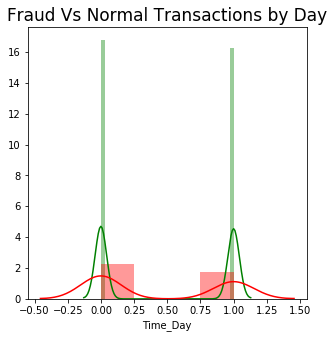

In [19]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

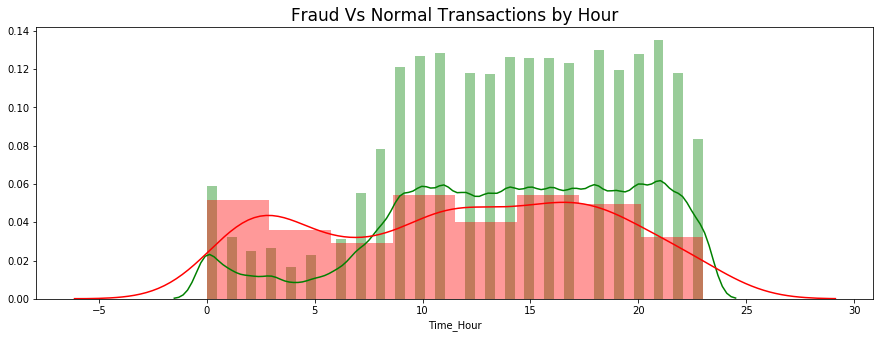

In [20]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

In [21]:
# Checking the distribution of Amount statistically towards Fraud and Non- Fraud 
Fraud = df[df['Class'] == 1]
Non_Fraud = df[df['Class'] == 0]

# Fraud Transaction Amount 
print(Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [22]:
#Non_Fraud Transiction Amount
print(Non_Fraud["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [23]:
# Drop unnecessary columns, which by analysis stating that won't be contributing further.

# As we have Bivariated the column 'Time' to Day/Hour/Minutes, so it is not usefull further.
df.drop('Time', axis = 1, inplace= True)
#And also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour.
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

## Step 3: Train/Test Split

In [24]:
#Create X and y dataset for independent and target column
y= df['Class']
X = df.drop(['Class'], axis=1)

In [25]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [26]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#splitting the Data in to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

### Checking the Skewness of the data

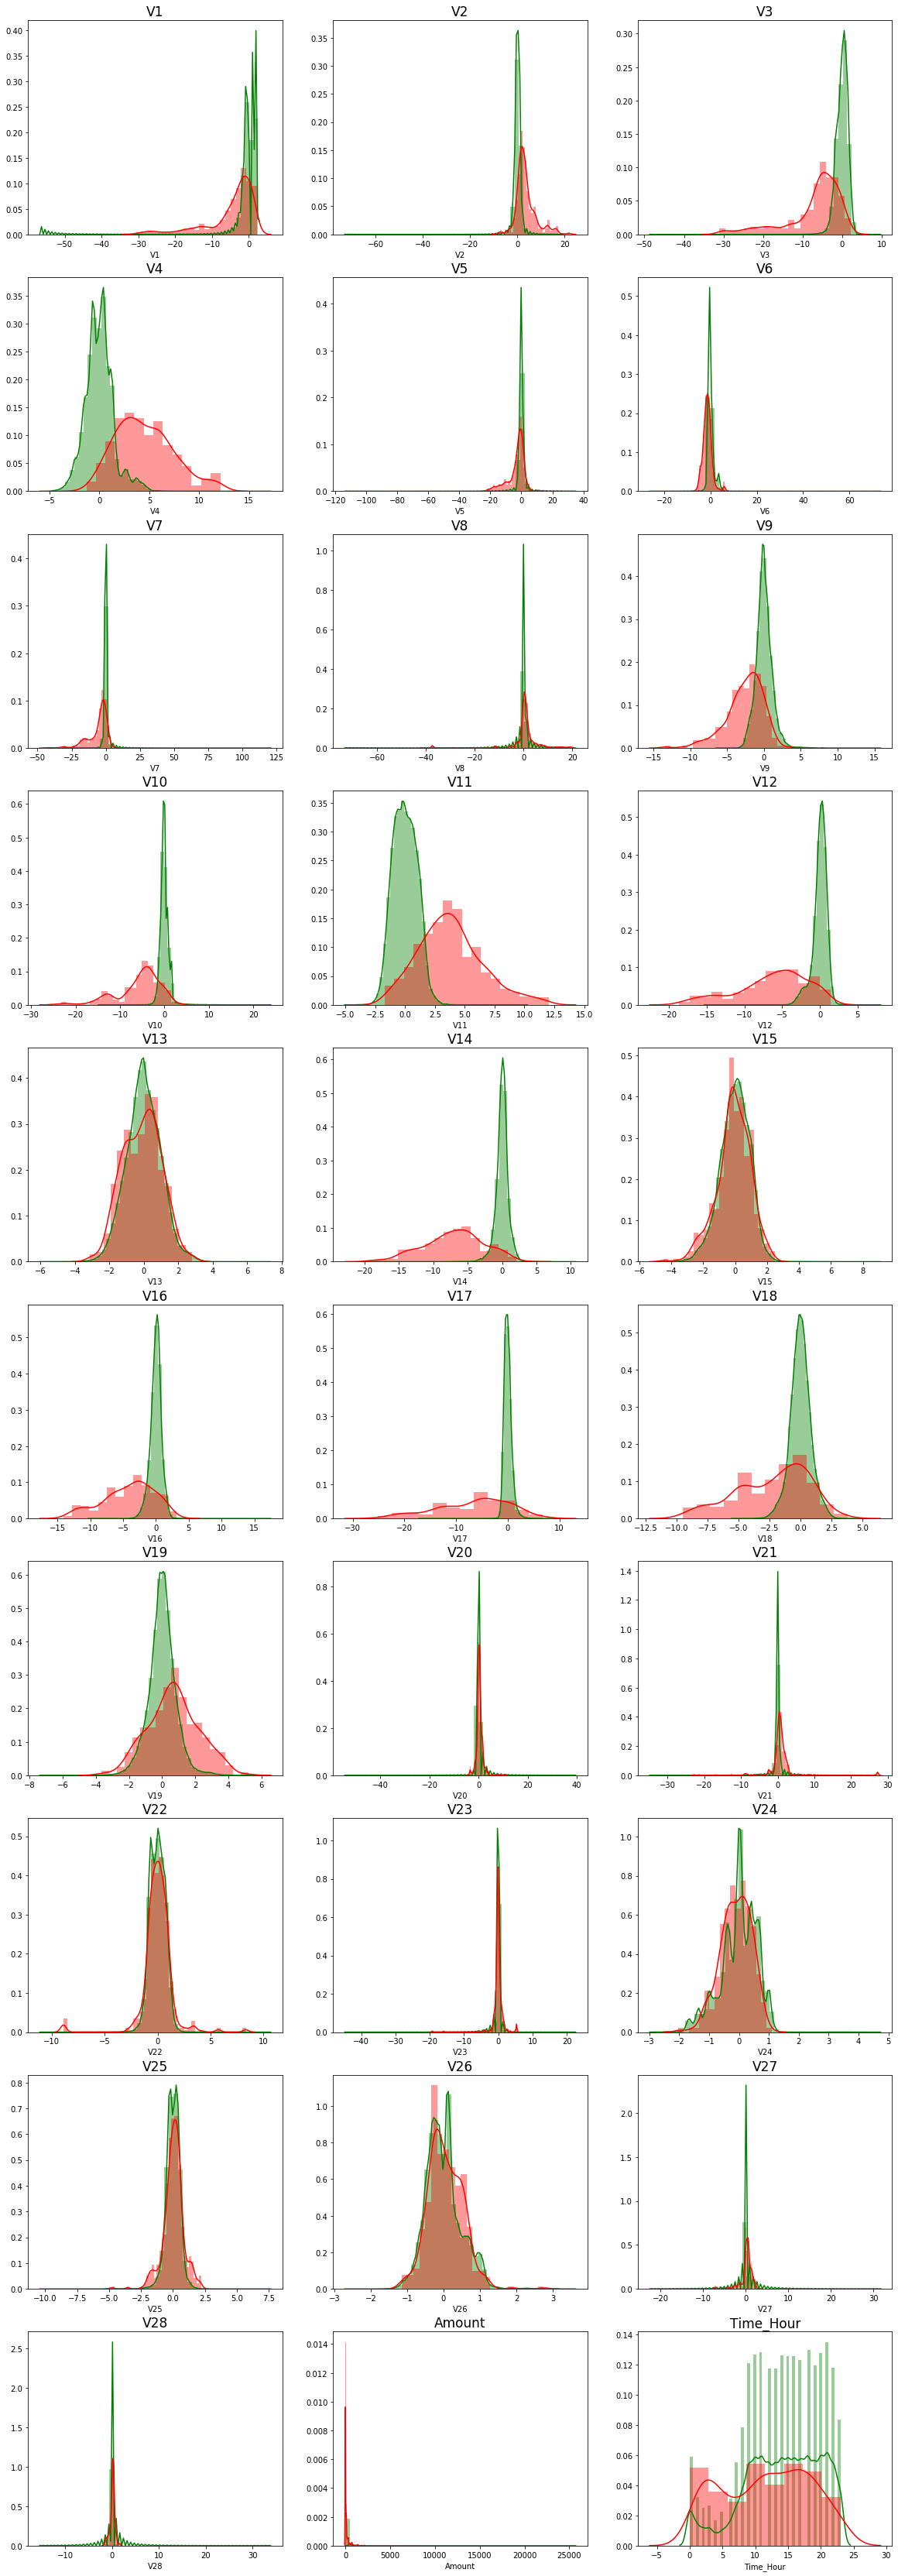

In [27]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)

Non_Fraud_records = df.Class == 0
Fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][Non_Fraud_records], color='green')
  sns.distplot(X[col][Fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Step 4: Model building/Hyperparameter Tuning

#### Creating model function

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.offline as py

#splitting train and test data 
train,test = train_test_split(df,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
target_col = ["Class"]
cols    = [i for i in df.columns if i not in target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]
  
#Creating a function for the output with Statistical model, Confusion matrix, ROC curve and Important feature
def credit_card_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    conf_matrix = confusion_matrix(testing_y,predictions)
    
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not Fraud","Fraud"],
                        y = ["Not Fraud","Fraud"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)

#### Model 1: Logistic Regression

In [29]:
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

credit_card_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.83      0.67      0.74       117

    accuracy                           1.00     71202
   macro avg       0.91      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy   Score :  0.9992275497879273
Area under curve :  0.833220792009566 



C:\Users\CSInfo\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 2: Decision Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.84      0.79      0.81       117

    accuracy                           1.00     71202
   macro avg       0.92      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy   Score :  0.9994101289289626
Area under curve :  0.8930428180058904 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



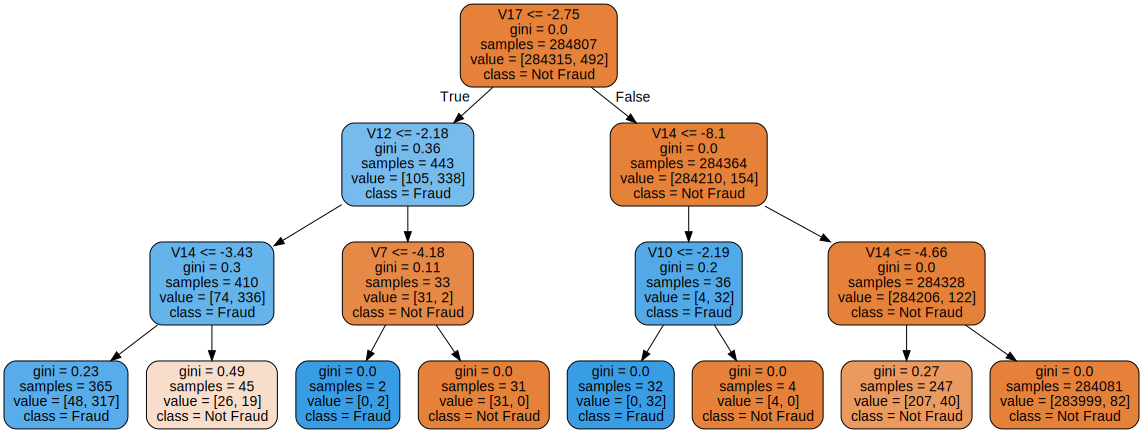

In [28]:
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display
from sklearn import tree

def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    dtc_x = df[columns]
    dtc_y = df[target_col]
    
    dt_classifier = tree.DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dtc_x,dtc_y)
    
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not Fraud","Fraud"],
                                        filled = True                         
                                       )
                  )
    
    if model_performance == True :
        credit_card_prediction(dt_classifier,
                                 dtc_x,test_X[columns],
                                 dtc_y,test_Y,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(cols,3,"gini","best",model_performance = True,)

#### Creating Model function for KNN

In [30]:
def credit_card_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not Fraud","Fraud"],
                        y = ["Not Fraud","Fraud"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    

#### Model 3: K-Nearest Neigbhors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
credit_card_prediction_alg(knn,train_X,test_X,train_Y,test_Y,threshold_plot = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.88      0.67      0.76       117

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy Score   :  0.9992977725344794
Area under curve :  0.8332559611732433


#### Model 4: Random Forest

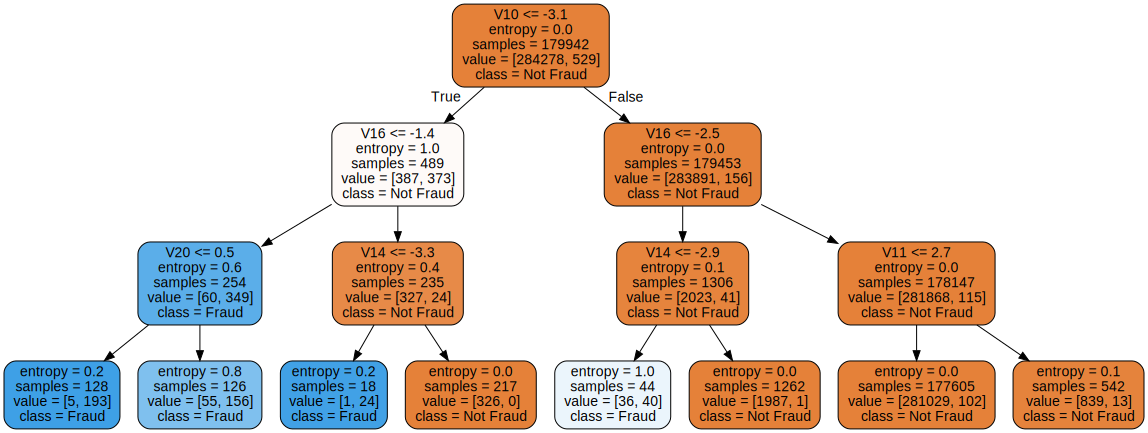

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.82      0.79      0.80       117

    accuracy                           1.00     71202
   macro avg       0.91      0.89      0.90     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy   Score :  0.9993679952810315
Area under curve :  0.893021716507684 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [32]:
from sklearn.ensemble import RandomForestClassifier

def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree, maximum_depth,
                           criterion_type, model_performance = None):
    dataframe = df[columns + target_col].copy()
    
    rf_x = dataframe[[i for i in columns if i not in target_col]]
    rf_y = dataframe[target_col]
    
    rfc = RandomForestClassifier(n_estimators = nf_estimators,
                                 max_depth = maximum_depth, 
                                 criterion = criterion_type,
                                )
    rfc.fit(rf_x, rf_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree, out_file = None, 
                                        rounded = True, proportion = False,
                            feature_names = columns,
                            precision = True,
                            class_names = ['Not Fraud', 'Fraud'],
                            filled = True))
    
    display(graph)
    
    if model_performance == True:
        credit_card_prediction(rfc, 
                                 rf_x, test_X[columns],
                                 rf_y, test_Y,
                                 columns, 'features', threshold_plot = True)
        
cols1 = [i for i in train_X.columns if i not in target_col]
plot_tree_randomforest(cols1, 100, 99, 3, 'entropy', True)


#### Model 5: Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

credit_card_prediction_alg(gnb,train_X,test_X,train_Y,test_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71085
           1       0.06      0.86      0.12       117

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.98      0.99     71202

Accuracy Score   :  0.9783994831605853
Area under curve :  0.9209184382005653


#### Model 6: XGBoost

In [34]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


credit_card_prediction(xgc,train_X,test_X,train_Y,test_Y,
                         cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.93      0.85      0.89       117

    accuracy                           1.00     71202
   macro avg       0.97      0.92      0.94     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy   Score :  0.9996488862672397
Area under curve :  0.923027686247775 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 7: Light Gradient Boosting Machine (LGBM) 

In [35]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type = 'gbdt', class_weight = None, colsample_bytree=1.0, learning_rate = 0.5, max_depth = 7,
                        min_child_samples = 20, min_child_weight = 0.001, min_split_gain = 0.0, n_estimators = 100, 
                        n_jobs = -1, num_leaves = 500, objective = 'binary', random_state = None, reg_alpha = 0.0,
                        reg_lambda = 0.0, silent = True, subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0)

cols = [i for i in df.columns if i not in target_col]
credit_card_prediction(lgbm_c, train_X,test_X,train_Y,test_Y, cols, 'features', threshold_plot= True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     71085
           1       0.00      0.01      0.00       117

    accuracy                           0.93     71202
   macro avg       0.50      0.47      0.48     71202
weighted avg       1.00      0.93      0.96     71202

Accuracy   Score :  0.9306199264065617
Area under curve :  0.470342295157657 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Creating Model with SMOTE

In [36]:
from imblearn.over_sampling import SMOTE


cols    = [i for i in df.columns if i not in target_col]

smote_X = df[cols]
smote_Y = df[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)


#### Model 8: Logistic Regression with SMOTE

In [37]:
logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

credit_card_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71085
           1       0.07      0.94      0.14       117

    accuracy                           0.98     71202
   macro avg       0.54      0.96      0.56     71202
weighted avg       1.00      0.98      0.99     71202

Accuracy   Score :  0.9808151456419764
Area under curve :  0.9605264913979833 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 9: Decision Tree with SMOTE

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     71085
           1       0.04      0.93      0.07       117

    accuracy                           0.96     71202
   macro avg       0.52      0.95      0.53     71202
weighted avg       1.00      0.96      0.98     71202

Accuracy   Score :  0.9617707367770568
Area under curve :  0.946722143767934 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



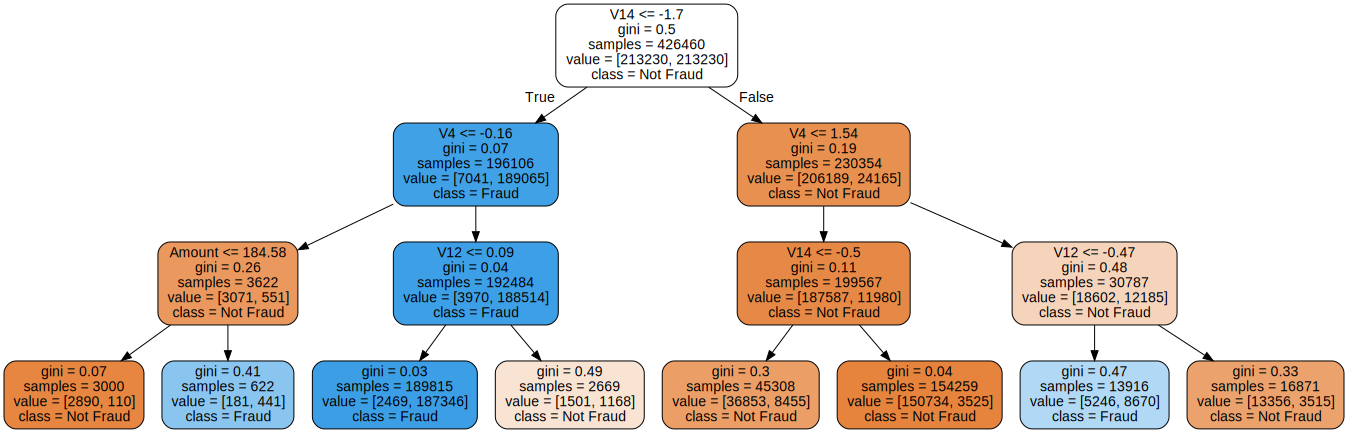

In [38]:
def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    smote_dt_X = os_smote_X[cols]
    smote_dt_Y = os_smote_Y[target_col]

    
    dt_classifier = tree.DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(smote_dt_X,smote_dt_Y)
    
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not Fraud","Fraud"],
                                        filled = True                         
                                       )
                  )
    
    if model_performance == True :
        credit_card_prediction(dt_classifier,
                                 smote_dt_X,test_X[columns],
                                 smote_dt_Y,test_Y,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(cols,3,"gini","best",model_performance = True,)

#### Model 10: K-Nearest Neighbors with SMOTE

from sklearn.neighbors import KNeighborsClassifier
knn_smote = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
credit_card_prediction_alg(knn_smote,os_smote_X,test_X,os_smote_Y,test_Y,threshold_plot = True)

#### Model 11: Random Forest with SMOTE

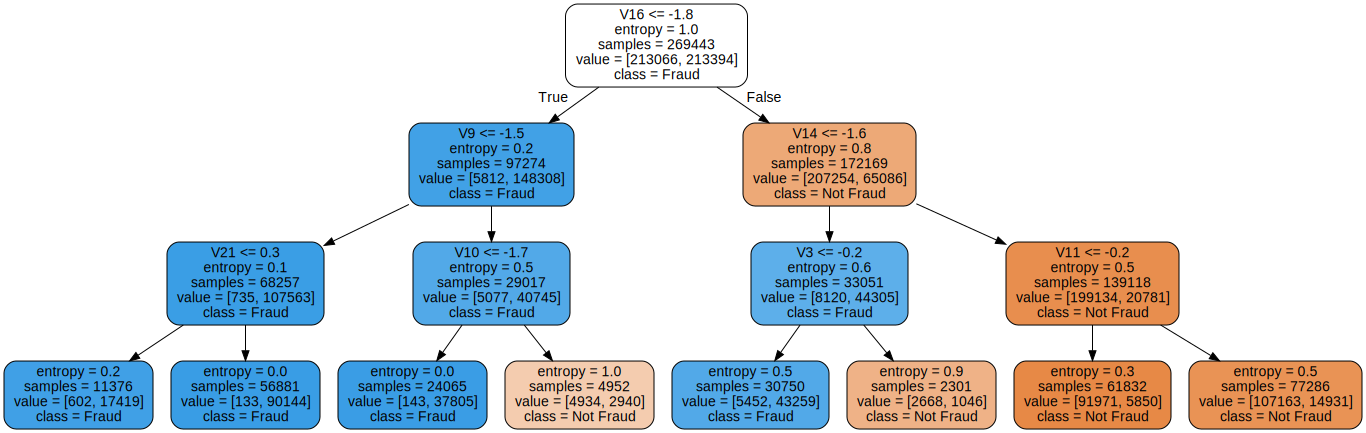

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71085
           1       0.19      0.91      0.32       117

    accuracy                           0.99     71202
   macro avg       0.60      0.95      0.66     71202
weighted avg       1.00      0.99      1.00     71202

Accuracy   Score :  0.9936939973596247
Area under curve :  0.9499106342533226 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [40]:
def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree, maximum_depth,
                           criterion_type, model_performance = None):
    
    smote_dt_X = os_smote_X[cols]
    smote_dt_Y = os_smote_Y[target_col]
    
    rfc = RandomForestClassifier(n_estimators = nf_estimators,
                                 max_depth = maximum_depth, 
                                 criterion = criterion_type,
                                )
    rfc.fit(smote_dt_X, smote_dt_Y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree, out_file = None, 
                                        rounded = True, proportion = False,
                            feature_names = columns,
                            precision = True,
                            class_names = ['Not Fraud', 'Fraud'],
                            filled = True))
    
    display(graph)
    
    if model_performance == True:
        credit_card_prediction(rfc, 
                                 smote_dt_X, test_X[columns],
                                 smote_dt_Y, test_Y,
                                 columns, 'features', threshold_plot = True)
        
cols1 = [i for i in train_X.columns if i not in target_col]
plot_tree_randomforest(cols1, 100, 99, 3, 'entropy', True)


#### Model 12: Navie Bayes with SMOTE

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb_smote = GaussianNB(priors=None)

credit_card_prediction_alg(gnb_smote,os_smote_X,test_X,os_smote_Y,test_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71085
           1       0.06      0.89      0.11       117

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

Accuracy Score   :  0.9754641723547092
Area under curve :  0.932247778481161


#### Model 13: XGBoost with SMOTE

In [42]:
xgc_smote = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


credit_card_prediction(xgc_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.79      0.91      0.84       117

    accuracy                           1.00     71202
   macro avg       0.90      0.95      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy   Score :  0.9994522625768939
Area under curve :  0.9527945056748601 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 14: Light Gradient Boosting Machine (LGBM) with SMOTE

In [43]:
lgbm_c_smote = LGBMClassifier(boosting_type = 'gbdt', class_weight = None, colsample_bytree=1.0, learning_rate = 0.5, max_depth = 7,
                        min_child_samples = 20, min_child_weight = 0.001, min_split_gain = 0.0, n_estimators = 100, 
                        n_jobs = -1, num_leaves = 500, objective = 'binary', random_state = None, reg_alpha = 0.0,
                        reg_lambda = 0.0, silent = True, subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0)

cols = [i for i in df.columns if i not in target_col]
credit_card_prediction(lgbm_c_smote,os_smote_X,test_X,os_smote_Y,test_Y, cols, 'features', threshold_plot= True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71085
           1       0.19      0.91      0.31       117

    accuracy                           0.99     71202
   macro avg       0.59      0.95      0.65     71202
weighted avg       1.00      0.99      1.00     71202

Accuracy   Score :  0.9933569281761748
Area under curve :  0.9497418222676717 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Cross Validation with RepeatedKFold

In [94]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

y_train_cv = y_train_cv.to_frame().reset_index()
del y_train_cv['index']


TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     4     12     13 ... 284799 284801 284805]
TRAIN: [     0      1      2 ... 284801 284804 284805] TEST: [     5     14     16 ... 284802 284803 284806]
TRAIN: [     0      4      5 ... 284803 284805 284806] TEST: [     1      2      3 ... 284796 284800 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     6      8     21 ... 284768 284785 284797]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      9     18 ... 284789 284794 284798]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     4      5      8 ... 284790 284793 284804]
TRAIN: [     0      2      3 ... 284803 284804 284806] TEST: [     1      7     10 ... 284797 284798 284805]
TRAIN: [     1      4      5 ... 284803 284804 284805] TEST: [     0      2      3 ... 284795 284799 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    15     23     27 ... 284801 284802 284803]
TRAIN: [     0     

#### Model 15: Logistic Regression with RepeatedKFold

In [88]:
logit_KF = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

credit_card_prediction(logit_KF, X_train_cv, X_test_cv, y_train_cv, y_test_cv,
                         cols,"coefficients",threshold_plot = True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.85      0.64      0.73       106

    accuracy                           1.00     56961
   macro avg       0.92      0.82      0.87     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9991222064219378
Area under curve :  0.8206491853656189 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 16: Decision Tree with RepeatedKFold

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.90      0.64      0.75       112

    accuracy                           1.00     56961
   macro avg       0.95      0.82      0.87     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9991573181650603
Area under curve :  0.8213582095928311 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



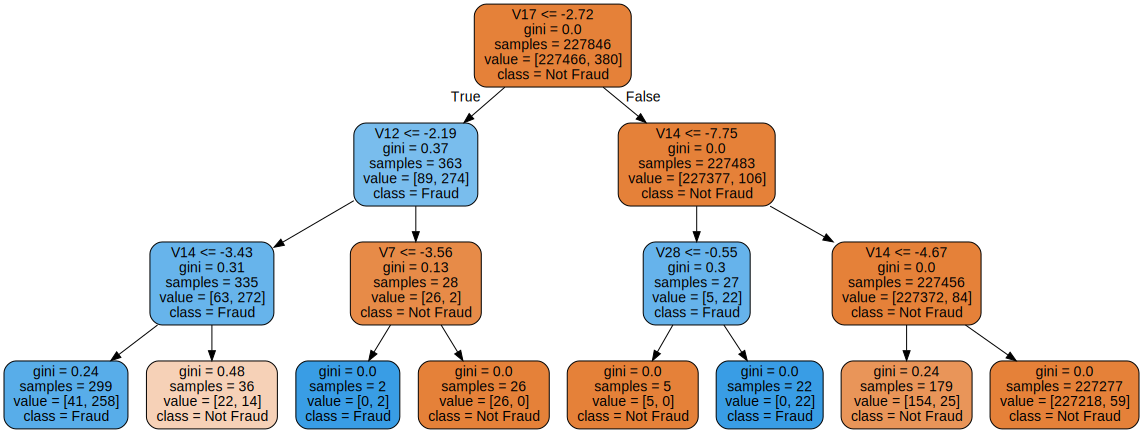

In [96]:
def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    dt_KF_x = X_train_cv[cols]
    dt_KF_y = y_train_cv[target_col]

    
    dt_classifier = tree.DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dt_KF_x,dt_KF_y)
    
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not Fraud","Fraud"],
                                        filled = True                         
                                       )
                  )
    
    if model_performance == True :
        credit_card_prediction(dt_classifier,
                                 dt_KF_x,X_test_cv,
                                 dt_KF_y,y_test_cv,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(cols,3,"gini","best",model_performance = True,)


### Model 17: K-Nearest Neighbors with RepeatedKFold

In [97]:
knn_KF = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
credit_card_prediction_alg(knn_KF,X_train_cv, X_test_cv, y_train_cv, y_test_cv,threshold_plot = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.92      0.58      0.71       112

    accuracy                           1.00     56961
   macro avg       0.96      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy Score   :  0.9990695388072541
Area under curve :  0.7901258000517662


#### Model 18: Random Forest with RepeatedKfold

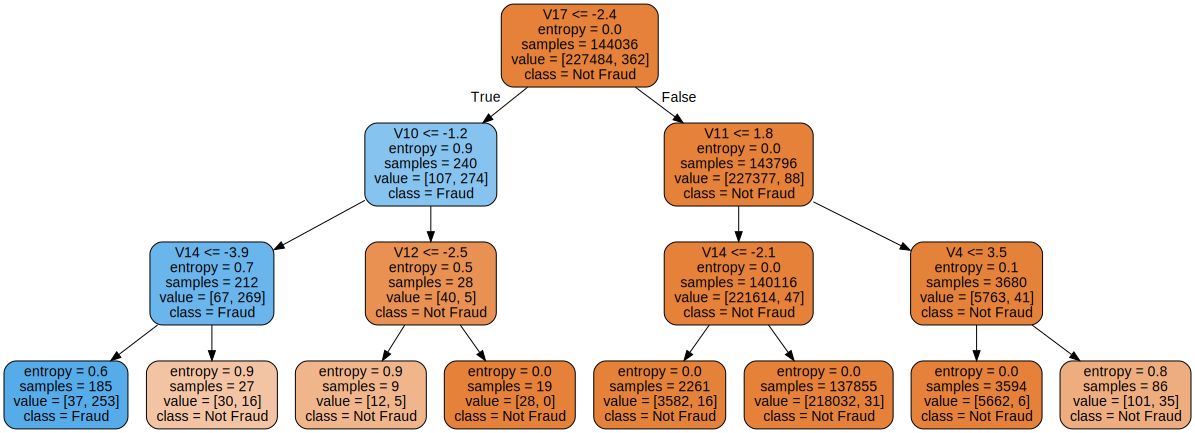

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.89      0.58      0.70       112

    accuracy                           1.00     56961
   macro avg       0.94      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9990344270641316
Area under curve :  0.7901082095928311 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [98]:
def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree, maximum_depth,
                           criterion_type, model_performance = None):
    
    dt_KF_x = X_train_cv[cols]
    dt_KF_y = y_train_cv[target_col]
    
    rfc = RandomForestClassifier(n_estimators = nf_estimators,
                                 max_depth = maximum_depth, 
                                 criterion = criterion_type,
                                )
    rfc.fit(dt_KF_x, dt_KF_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree, out_file = None, 
                                        rounded = True, proportion = False,
                            feature_names = columns,
                            precision = True,
                            class_names = ['Not Fraud', 'Fraud'],
                            filled = True))
    
    display(graph)
    
    if model_performance == True:
        credit_card_prediction(rfc, 
                                 dt_KF_x,X_test_cv,
                                 dt_KF_y,y_test_cv,
                                 columns, 'features', threshold_plot = True)
        
plot_tree_randomforest(cols, 100, 99, 3, 'entropy', True)


#### Model 19: Navie Bayes with RepeatedKFold

In [99]:
from sklearn.naive_bayes import GaussianNB
gnb_KF = GaussianNB(priors=None)

credit_card_prediction_alg(gnb_KF,X_train_cv, X_test_cv, y_train_cv, y_test_cv)

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56849
           1       0.07      0.79      0.13       112

    accuracy                           0.98     56961
   macro avg       0.54      0.89      0.56     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy Score   :  0.9791962921999262
Area under curve :  0.8871013719301508


#### Model 20: XGBoost with RepeatedKFold

In [100]:
xgc_KF = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


credit_card_prediction(xgc_KF,X_train_cv, X_test_cv, y_train_cv, y_test_cv,
                         cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.96      0.76      0.85       112

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9994557679816014
Area under curve :  0.8794291047964156 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 21: Light Gradient Boosting Machine (LGBM) with RepeatedKFold

In [113]:
lgbm_c_KF = LGBMClassifier(boosting_type = 'gbdt', class_weight = None, colsample_bytree=1.0, learning_rate = 0.5, max_depth = 7,
                        min_child_samples = 20, min_child_weight = 0.001, min_split_gain = 0.0, n_estimators = 100, 
                        n_jobs = -1, num_leaves = 500, objective = 'binary', random_state = None, reg_alpha = 0.0,
                        reg_lambda = 0.0, silent = True, subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0)

cols = [i for i in df.columns if i not in target_col]
credit_card_prediction(lgbm_c_KF,X_train_cv, X_test_cv, y_train_cv, y_test_cv, cols, 'features', threshold_plot= True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.00      0.00      0.00       112

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9973490633942522
Area under curve :  0.4996569860507661 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Cross Validation with StratifiedKfold

In [114]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

y_train_SKF_cv = y_train_SKF_cv.to_frame().reset_index()
del y_train_SKF_cv['index']

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


#### Model 22: Logistic Regression with StratifiedKFold

In [115]:
logit_SKF = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

credit_card_prediction(logit_SKF, X_train_SKF_cv, X_test_SKF_cv, y_train_SKF_cv, y_test_SKF_cv,
                         cols,"coefficients",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.49      0.64        98

    accuracy                           1.00     56961
   macro avg       0.96      0.74      0.82     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9990519829356929
Area under curve :  0.7448627869275491 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 23: Decision Tree with StratifiedKFold

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.63      0.74        98

    accuracy                           1.00     56961
   macro avg       0.95      0.82      0.87     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9992450975228665
Area under curve :  0.8162649791640273 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



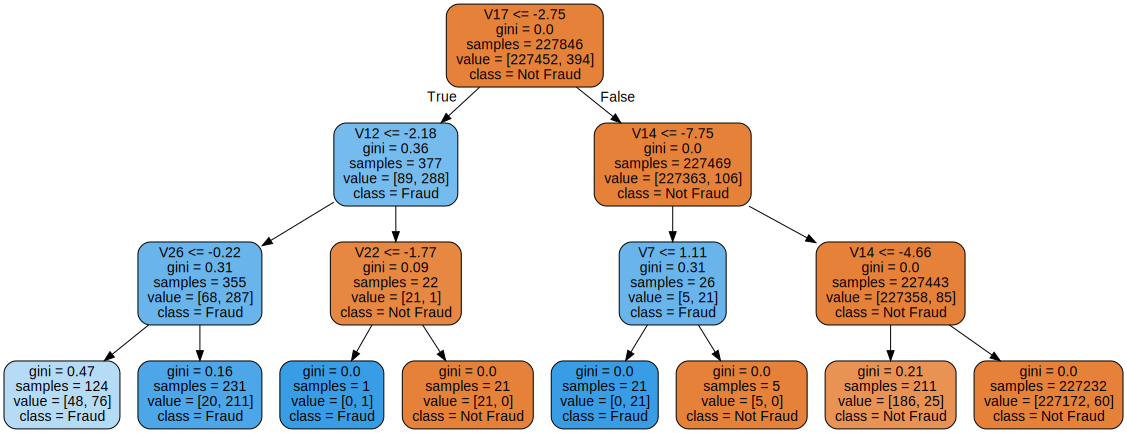

In [118]:
def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    dt_SKF_x = X_train_SKF_cv[cols]
    dt_SKF_y = y_train_SKF_cv[target_col]

    
    dt_classifier = tree.DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dt_SKF_x,dt_SKF_y)
    
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not Fraud","Fraud"],
                                        filled = True                         
                                       )
                  )
    
    if model_performance == True :
        credit_card_prediction(dt_classifier,
                                 dt_SKF_x,X_test_SKF_cv,
                                 dt_SKF_y,y_test_SKF_cv,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(cols,3,"gini","best",model_performance = True,)


#### Model 24: K-Nearest Neighbors with StratifiedKFold

In [119]:
knn_SKF = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
credit_card_prediction_alg(knn_SKF,X_train_SKF_cv, X_test_SKF_cv, y_train_SKF_cv, y_test_SKF_cv,threshold_plot = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy Score   :  0.9991924299081828
Area under curve :  0.7703993702012751


#### Model 25: Random Forest with StratifiedKFold

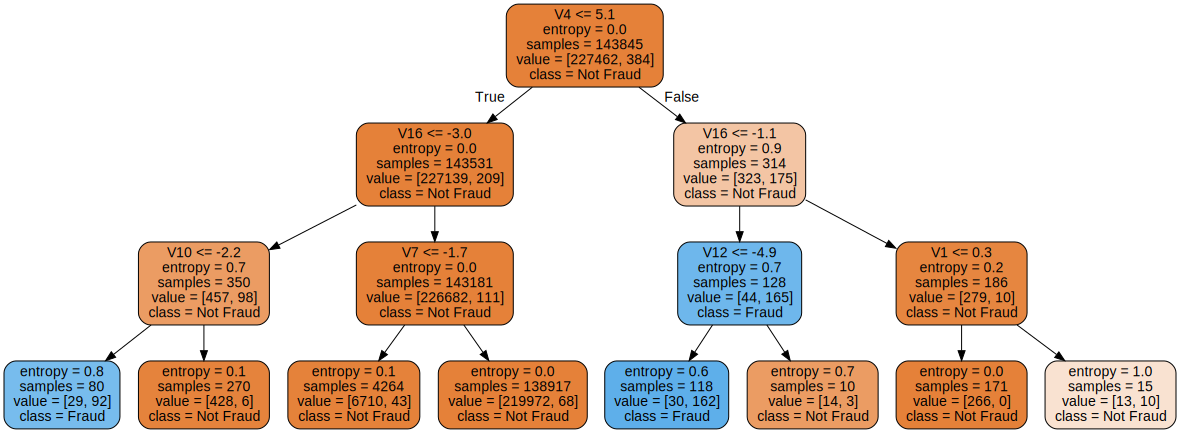

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.49      0.65        98

    accuracy                           1.00     56961
   macro avg       0.99      0.74      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9991046505503766
Area under curve :  0.7448891661196424 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [121]:
def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree, maximum_depth,
                           criterion_type, model_performance = None):
    
    dt_SKF_x = X_train_SKF_cv[cols]
    dt_SKF_y = y_train_SKF_cv[target_col]
    
    rfc = RandomForestClassifier(n_estimators = nf_estimators,
                                 max_depth = maximum_depth, 
                                 criterion = criterion_type,
                                )
    rfc.fit(dt_SKF_x, dt_SKF_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree, out_file = None, 
                                        rounded = True, proportion = False,
                            feature_names = columns,
                            precision = True,
                            class_names = ['Not Fraud', 'Fraud'],
                            filled = True))
    
    display(graph)
    
    if model_performance == True:
        credit_card_prediction(rfc, 
                                 dt_SKF_x,X_test_SKF_cv,
                                 dt_SKF_y,y_test_SKF_cv,
                                 columns, 'features', threshold_plot = True)
        
plot_tree_randomforest(cols, 100, 99, 3, 'entropy', True)


#### Model 26: Navie Bayes with StratifiedKFold

In [122]:
from sklearn.naive_bayes import GaussianNB
gnb_SKF = GaussianNB(priors=None)

credit_card_prediction_alg(gnb_SKF,X_train_SKF_cv, X_test_SKF_cv, y_train_SKF_cv, y_test_SKF_cv)

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.79      0.12        98

    accuracy                           0.98     56961
   macro avg       0.53      0.88      0.56     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy Score   :  0.9805305384385807
Area under curve :  0.8832902891913145


#### Model 27: XGBoost with StratifiedKFold

In [123]:
xgc_SKF = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


credit_card_prediction(xgc_SKF,X_train_SKF_cv, X_test_SKF_cv, y_train_SKF_cv, y_test_SKF_cv,
                         cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.69      0.80        98

    accuracy                           1.00     56961
   macro avg       0.97      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9993855444953564
Area under curve :  0.8468948101900486 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 28: Light Gradient Boosting Machine (LGBM) with StratifiedKFold

In [124]:
lgbm_c_SKF = LGBMClassifier(boosting_type = 'gbdt', class_weight = None, colsample_bytree=1.0, learning_rate = 0.5, max_depth = 7,
                        min_child_samples = 20, min_child_weight = 0.001, min_split_gain = 0.0, n_estimators = 100, 
                        n_jobs = -1, num_leaves = 500, objective = 'binary', random_state = None, reg_alpha = 0.0,
                        reg_lambda = 0.0, silent = True, subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0)

cols = [i for i in df.columns if i not in target_col]
credit_card_prediction(lgbm_c_SKF,X_train_SKF_cv, X_test_SKF_cv, y_train_SKF_cv, y_test_SKF_cv, cols, 'features', threshold_plot= True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.02      0.04        98

    accuracy                           1.00     56961
   macro avg       1.00      0.51      0.52     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9983146363301206
Area under curve :  0.5102040816326531 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Random Under Sampler

In [125]:
from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)
y_Under = pd.DataFrame(data=y_Under,   columns=target_col)

#### Model 29: Logistic Regression with RandomUnderSampler

In [111]:
logit_RUS = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

credit_card_prediction(logit_RUS, X_Under,X_test,  y_Under, y_test,
                         cols,"coefficients",threshold_plot = True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.11      0.88      0.20        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy   Score :  0.9875879988062007
Area under curve :  0.9326643307024726 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 30: Decision Tree with RandomUnderSampler

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.16      0.82      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Accuracy   Score :  0.9921526631789614
Area under curve :  0.9076775152698155 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



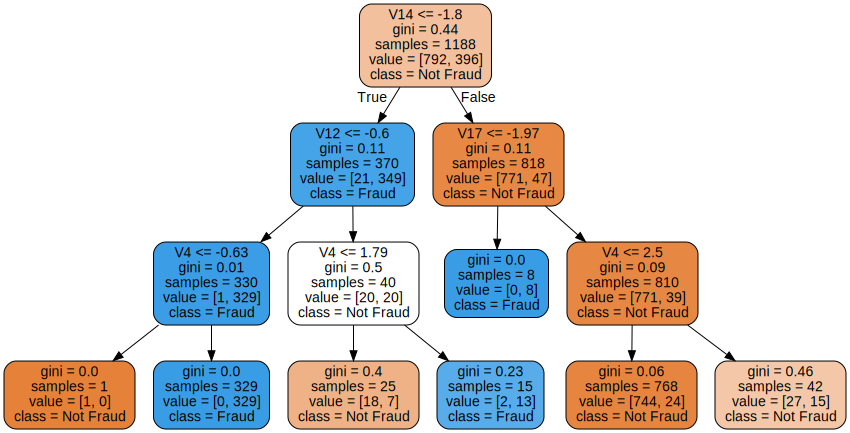

In [106]:
def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    dt_RUS_x = X_Under[cols]
    dt_RUS_y = y_Under[target_col]

    
    dt_classifier = tree.DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dt_RUS_x,dt_RUS_y)
    
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not Fraud","Fraud"],
                                        filled = True                         
                                       )
                  )
    
    if model_performance == True :
        credit_card_prediction(dt_classifier,
                                 dt_RUS_x,X_test[columns],
                                 dt_RUS_y,y_test,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(cols,3,"gini","best",model_performance = True,)


#### Model 31: K-Nearest Neighbors with RandomUnderSampler

In [126]:
knn_RUS = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
credit_card_prediction_alg(knn_RUS,X_Under,X_test, y_Under,y_test,threshold_plot = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.05      0.69      0.09        98

    accuracy                           0.98     56961
   macro avg       0.52      0.84      0.54     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy Score   :  0.9760537911904636
Area under curve :  0.835208828092727


#### Model 32: Random Forest with RandomUnderSampler

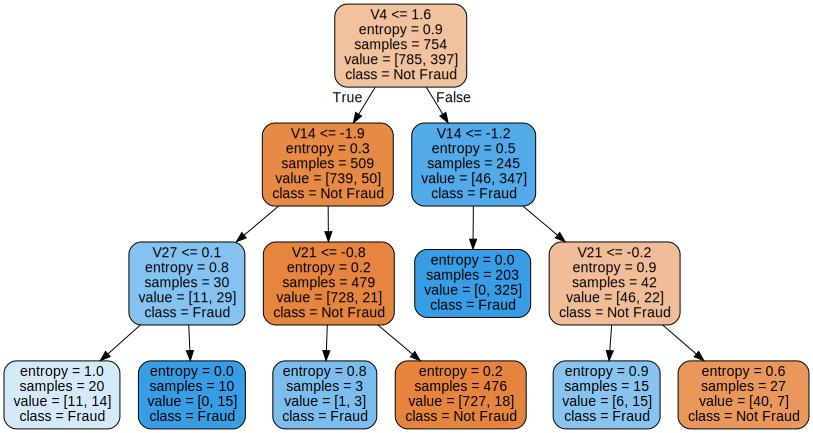

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.47      0.80      0.59        98

    accuracy                           1.00     56961
   macro avg       0.74      0.90      0.80     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9981215217429469
Area under curve :  0.8971941871027644 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [127]:
def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree, maximum_depth,
                           criterion_type, model_performance = None):
    
    dt_RUS_x = X_Under[cols]
    dt_RUS_y = y_Under[target_col]
    
    rfc = RandomForestClassifier(n_estimators = nf_estimators,
                                 max_depth = maximum_depth, 
                                 criterion = criterion_type,
                                )
    rfc.fit(dt_RUS_x, dt_RUS_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree, out_file = None, 
                                        rounded = True, proportion = False,
                            feature_names = columns,
                            precision = True,
                            class_names = ['Not Fraud', 'Fraud'],
                            filled = True))
    
    display(graph)
    
    if model_performance == True:
        credit_card_prediction(rfc, 
                                 dt_RUS_x,X_test[columns],
                                 dt_RUS_y,y_test,
                                 columns, 'features', threshold_plot = True)
        
plot_tree_randomforest(cols, 100, 99, 3, 'entropy', True)


#### Model 33: Navie Bayes with RandomUnderSampler

In [128]:
from sklearn.naive_bayes import GaussianNB
gnb_RUS = GaussianNB(priors=None)

credit_card_prediction_alg(gnb_RUS,X_Under,X_test,  y_Under,y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.05      0.82      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.89      0.54     56961
weighted avg       1.00      0.97      0.98     56961

Accuracy Score   :  0.9727532873369499
Area under curve :  0.8946747050824269


#### Model 34: XGBoost with RandomUnderSampler

In [129]:
xgc_RUS = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


credit_card_prediction(xgc_RUS,X_Under,X_test,  y_Under,y_test,
                         cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.06      0.88      0.11        98

    accuracy                           0.97     56961
   macro avg       0.53      0.93      0.55     56961
weighted avg       1.00      0.97      0.99     56961

Accuracy   Score :  0.9743859833921455
Area under curve :  0.926051946551091 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 35: Light Gradient Boosting Machine (LGBM) with RandomUnderSampler

In [130]:
lgbm_c_RUS = LGBMClassifier(boosting_type = 'gbdt', class_weight = None, colsample_bytree=1.0, learning_rate = 0.5, max_depth = 7,
                        min_child_samples = 20, min_child_weight = 0.001, min_split_gain = 0.0, n_estimators = 100, 
                        n_jobs = -1, num_leaves = 500, objective = 'binary', random_state = None, reg_alpha = 0.0,
                        reg_lambda = 0.0, silent = True, subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0)

cols = [i for i in df.columns if i not in target_col]
credit_card_prediction(lgbm_c_RUS,X_Under,X_test,  y_Under,y_test, cols, 'features', threshold_plot= True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.19        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy   Score :  0.9869384315584347
Area under curve :  0.9272457395810266 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Random Over Sampler

In [131]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)
y_over = pd.DataFrame(data=y_over,   columns=target_col)


#### Model 36: Logistic Regression with RandomOverSampler

In [134]:
logit_ROS = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

credit_card_prediction(logit_ROS, X_over,X_test, y_over, y_test,
                         cols,"coefficients",threshold_plot = True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy   Score :  0.986236196695985
Area under curve :  0.926894017019783 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 37: Decision Tree with RandomOverSampler

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.09      0.83      0.16        98

    accuracy                           0.98     56961
   macro avg       0.54      0.91      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy   Score :  0.9845332771545443
Area under curve :  0.9056680987995852 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



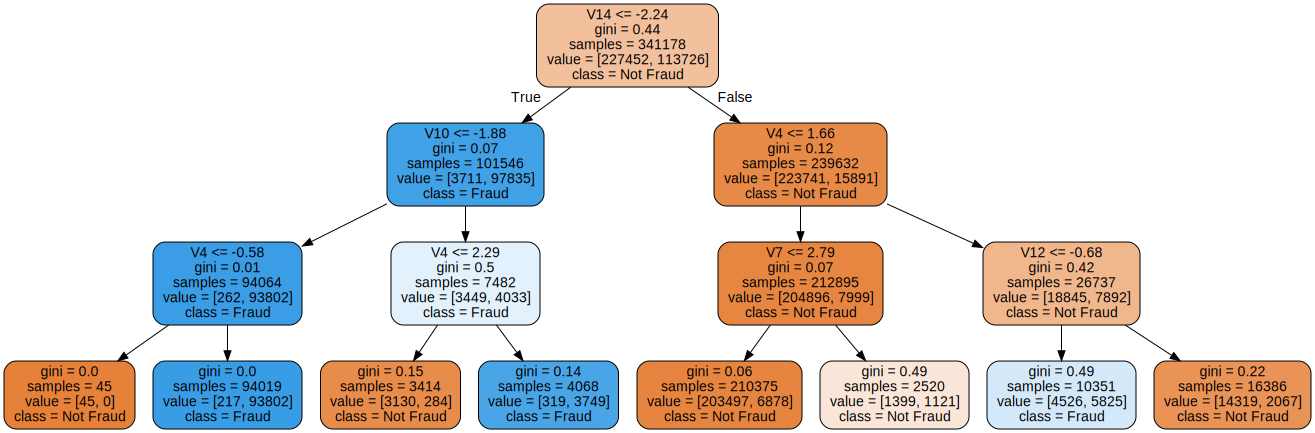

In [108]:
def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    dt_ROS_x = X_over[cols]
    dt_ROS_y = y_over[target_col]

    
    dt_classifier = tree.DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dt_ROS_x,dt_ROS_y)
    
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not Fraud","Fraud"],
                                        filled = True                         
                                       )
                  )
    
    if model_performance == True :
        credit_card_prediction(dt_classifier,
                                 dt_ROS_x,X_test[columns],
                                 dt_ROS_y,y_test,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(cols,3,"gini","best",model_performance = True,)


#### Model 38: K-Nearest Neighbors with RandomOverSampler

In [135]:
knn_ROS = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
credit_card_prediction_alg(knn_ROS,X_over,X_test, y_over,y_test,threshold_plot = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy Score   :  0.9980688541282632
Area under curve :  0.7953028528647623


#### Model 39: Random Forest with RandomOverSampler

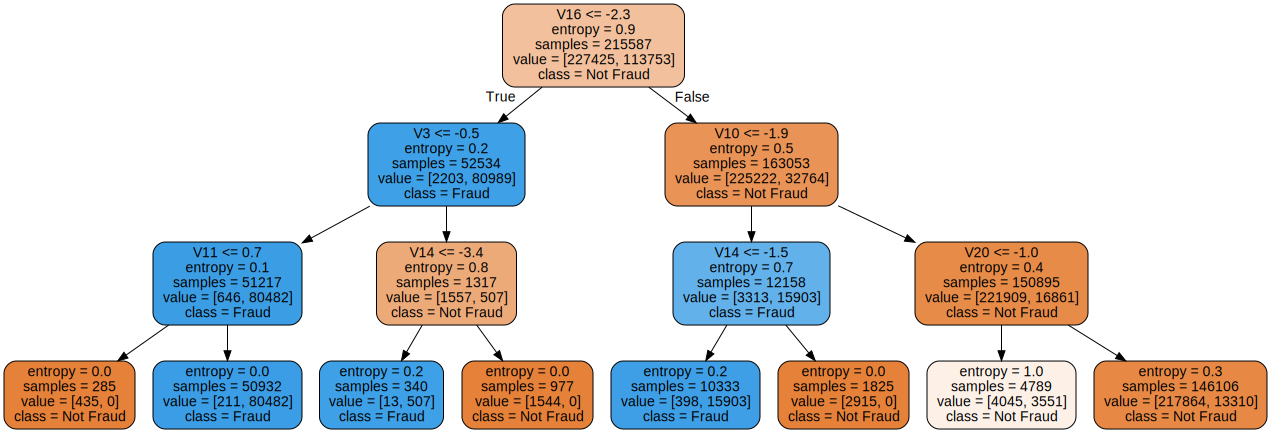

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.78      0.76        98

    accuracy                           1.00     56961
   macro avg       0.87      0.89      0.88     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9991573181650603
Area under curve :  0.887526482376008 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [136]:
def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree, maximum_depth,
                           criterion_type, model_performance = None):
    
    dt_ROS_x = X_over[cols]
    dt_ROS_y = y_over[target_col]
    
    rfc = RandomForestClassifier(n_estimators = nf_estimators,
                                 max_depth = maximum_depth, 
                                 criterion = criterion_type,
                                )
    rfc.fit(dt_ROS_x, dt_ROS_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree, out_file = None, 
                                        rounded = True, proportion = False,
                            feature_names = columns,
                            precision = True,
                            class_names = ['Not Fraud', 'Fraud'],
                            filled = True))
    
    display(graph)
    
    if model_performance == True:
        credit_card_prediction(rfc, 
                                 dt_ROS_x,X_test[columns],
                                 dt_ROS_y,y_test,
                                 columns, 'features', threshold_plot = True)
        
plot_tree_randomforest(cols, 100, 99, 3, 'entropy', True)


#### Model 40: Naive Bayes with RandomOverSampler

In [137]:
from sklearn.naive_bayes import GaussianNB
gnb_ROS = GaussianNB(priors=None)

credit_card_prediction_alg(gnb_ROS,X_over,X_test,  y_over,y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.80      0.11        98

    accuracy                           0.98     56961
   macro avg       0.53      0.89      0.55     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy Score   :  0.9774758167869244
Area under curve :  0.8868535438021997


#### Model 41: XGBoost with RandomOverSampler

xgc_ROS = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


credit_card_prediction(xgc_ROS,X_over,X_test, y_over,y_test,
                         cols,"features",threshold_plot = True)

#### Model 42: Light Gradient Boosting Machine (LGBM) with RandomOverSampler

In [112]:
lgbm_c_ROS = LGBMClassifier(boosting_type = 'gbdt', class_weight = None, colsample_bytree=1.0, learning_rate = 0.5, max_depth = 7,
                        min_child_samples = 20, min_child_weight = 0.001, min_split_gain = 0.0, n_estimators = 100, 
                        n_jobs = -1, num_leaves = 500, objective = 'binary', random_state = None, reg_alpha = 0.0,
                        reg_lambda = 0.0, silent = True, subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0)

cols = [i for i in df.columns if i not in target_col]
credit_card_prediction(lgbm_c_ROS, X_over,X_test,  y_over,y_test, cols, 'features', threshold_plot= True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.72      0.83        98

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9994733238531627
Area under curve :  0.8622185187670904 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Oversampling with ADASYN

In [158]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)
y_train_ADASYN = pd.DataFrame(data=y_train_ADASYN,   columns=target_col)

#### Model 43: Logistic Regression with ADASYN

In [159]:
logit_adasyn = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

credit_card_prediction(logit_adasyn,X_train_ADASYN, X_test, y_train_ADASYN , y_test,
                         cols,"coefficients",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56863
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56961
   macro avg       0.51      0.92      0.52     56961
weighted avg       1.00      0.95      0.97     56961

Accuracy   Score :  0.9490704166008321
Area under curve :  0.923558843722847 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 44: Decision Tree with ADASYN

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     56863
           1       0.02      0.91      0.04        98

    accuracy                           0.92     56961
   macro avg       0.51      0.91      0.50     56961
weighted avg       1.00      0.92      0.95     56961

Accuracy   Score :  0.9151524727445094
Area under curve :  0.9116638917670721 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



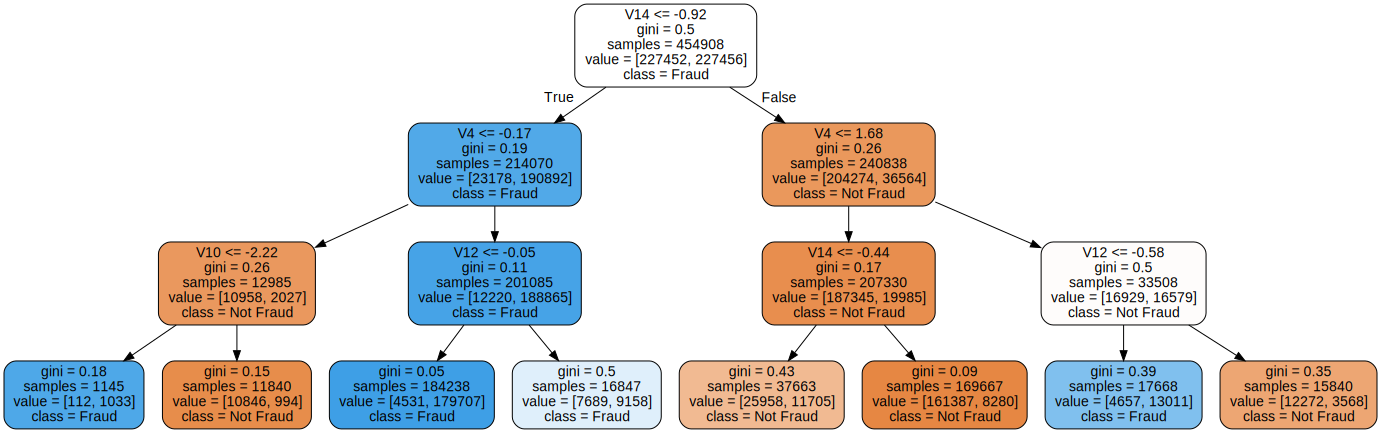

In [160]:
def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    dt_adasyn_x = X_train_ADASYN[cols]
    dt_adasyn_y = y_train_ADASYN[target_col]

    
    dt_classifier = tree.DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dt_adasyn_x,dt_adasyn_y)
    
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not Fraud","Fraud"],
                                        filled = True                         
                                       )
                  )
    
    if model_performance == True :
        credit_card_prediction(dt_classifier,
                                 dt_adasyn_x,X_test[columns],
                                 dt_adasyn_y,y_test,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(cols,3,"gini","best",model_performance = True,)


#### Model 45: K-Nearest Neighbors with ADASYN

In [161]:
knn_adasyn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
credit_card_prediction_alg(knn_adasyn,X_train_ADASYN, X_test, y_train_ADASYN , y_test,threshold_plot = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.19      0.71      0.30        98

    accuracy                           0.99     56961
   macro avg       0.60      0.85      0.65     56961
weighted avg       1.00      0.99      1.00     56961

Accuracy Score   :  0.9942943417425958
Area under curve :  0.8545313171256228


#### Model 46: Random Forest with ADASYN

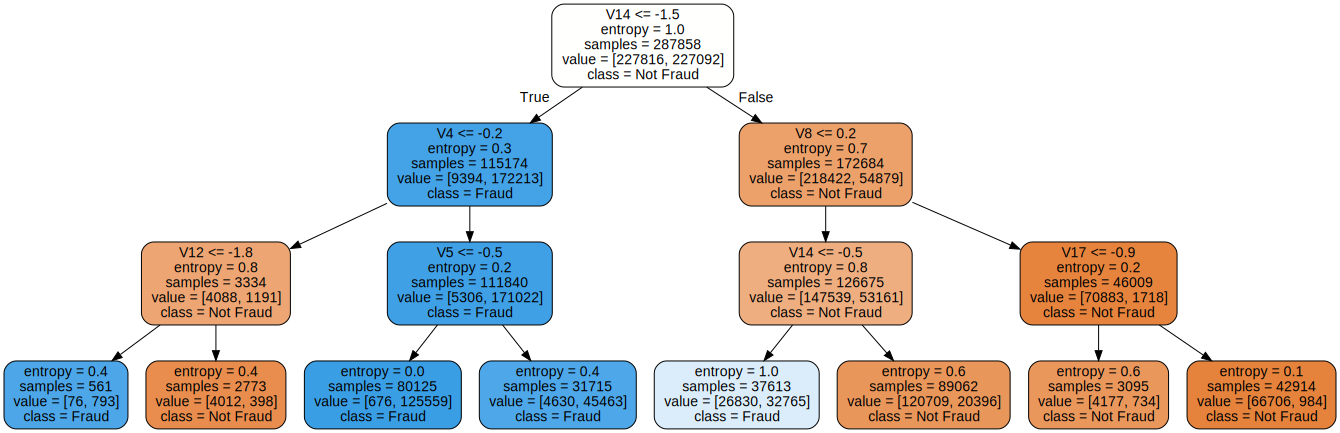

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.85      0.13        98

    accuracy                           0.98     56961
   macro avg       0.54      0.91      0.56     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy   Score :  0.9806358736679482
Area under curve :  0.9139025340892738 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [163]:
def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree, maximum_depth,
                           criterion_type, model_performance = None):
    
    dt_adasyn_x = X_train_ADASYN[cols]
    dt_adasyn_y = y_train_ADASYN[target_col]
    
    rfc = RandomForestClassifier(n_estimators = nf_estimators,
                                 max_depth = maximum_depth, 
                                 criterion = criterion_type,
                                )
    rfc.fit(dt_adasyn_x, dt_adasyn_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree, out_file = None, 
                                        rounded = True, proportion = False,
                            feature_names = columns,
                            precision = True,
                            class_names = ['Not Fraud', 'Fraud'],
                            filled = True))
    
    display(graph)
    
    if model_performance == True:
        credit_card_prediction(rfc, 
                                 dt_adasyn_x,X_test[columns],
                                 dt_adasyn_y,y_test,
                                 columns, 'features', threshold_plot = True)
        
plot_tree_randomforest(cols, 100, 99, 3, 'entropy', True)


#### Model 47: Navie Bayes with ADASYN

In [164]:
from sklearn.naive_bayes import GaussianNB
gnb_adasyn = GaussianNB(priors=None)

credit_card_prediction_alg(gnb_adasyn,X_train_ADASYN, X_test, y_train_ADASYN , y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.04      0.85      0.08        98

    accuracy                           0.97     56961
   macro avg       0.52      0.91      0.53     56961
weighted avg       1.00      0.97      0.98     56961

Accuracy Score   :  0.9683292077035165
Area under curve :  0.907738596203478


#### Model 48: XGBoost with ADASYN

In [165]:
xgc_adasyn = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


credit_card_prediction(xgc_adasyn,X_train_ADASYN, X_test, y_train_ADASYN , y_test,
                         cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.78      0.80        98

    accuracy                           1.00     56961
   macro avg       0.92      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.999350432752234
Area under curve :  0.8876232060803501 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Model 49: Light Gradient Boosting Machine (LGBM) with ADASYN

In [166]:
lgbm_c_adasyn = LGBMClassifier(boosting_type = 'gbdt', class_weight = None, colsample_bytree=1.0, learning_rate = 0.5, max_depth = 7,
                        min_child_samples = 20, min_child_weight = 0.001, min_split_gain = 0.0, n_estimators = 100, 
                        n_jobs = -1, num_leaves = 500, objective = 'binary', random_state = None, reg_alpha = 0.0,
                        reg_lambda = 0.0, silent = True, subsample = 1.0, subsample_for_bin = 200000, subsample_freq = 0)

cols = [i for i in df.columns if i not in target_col]
credit_card_prediction(lgbm_c_adasyn,X_train_ADASYN, X_test, y_train_ADASYN , y_test, cols, 'features', threshold_plot= True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.72      0.72      0.72        98

    accuracy                           1.00     56961
   macro avg       0.86      0.86      0.86     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy   Score :  0.9990344270641316
Area under curve :  0.861998692166313 



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Hyperparameter Tuning for Final Model

In [168]:
#Evaluate XGboost model
from xgboost import XGBClassifier
from sklearn import metrics

# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv, y_train_cv)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9995435473394076
XGboost roc_value: 0.9910964843176601
XGBoost threshold: 0.001987359020859003


## Step 5: Model evaluation

### Conclusion:
- After runing multiple Models on Imbalanced data, and doing multiple Oversampling on imbalance class, We came to the conclusion that the  `XGBoost Model with RepeatedKFold` is performing better than all other.
- There are other Models also which are performing better, but then there is mismatch between either Precision, Recall, f1-score, Accuracy or AUC.
- But then the `XGBoost Model with RepeatedKFold` model giving the balanced ratio.
- Here is the overall statistics of the `XGBoost Model with RepeatedKFold` model.
  - Model Accuracy : 0.9995435473394076
  - AUC score      : 0.8794291047964156 
  - ROC score      : 0.9910964843176601
  - Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.96      0.76      0.85       112